In [ ]:
import pandas as pd
df=pd.read_excel('loan3(na).xlsx')

In [ ]:
df.head()

,loan,Industry_type,Company_type,Beginning_time,Collateral,Bank_relationship,Capital_increase,Age,Education,Credit
0,1.0,1,1.0,4,4,1,4,3,2,2
1,1.0,2,1.0,2,3,2,3,4,3,2
2,1.0,1,1.0,3,3,1,4,3,4,1
3,1.0,2,1.0,4,1,1,4,3,4,2
4,1.0,1,1.0,3,1,1,3,2,3,2


In [ ]:
df1=df.dropna()
X=df1[['Industry_type','Company_type','Beginning_time','Bank_relationship','Capital_increase','Age','Education','Credit']]
y=df1['loan'] 
from sklearn.model_selection import train_test_split #區分訓練集與測試集
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5) 

## **一、分類器(Decision Tree)**

# **決策樹(DecisionTreeClassifier)**

In [ ]:
#以決策樹建立預測模型
from sklearn import tree
DT = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
DT= DT.fit(X_train, y_train)

In [ ]:
#列出各特徵重要程度
print('特徵重要程度: ',DT.feature_importances_)

特徵重要程度:  [0.07467818 0.06508476 0.06130792 0.10484083 0.05024697 0.18039264
 0.02361387 0.43983484]


In [ ]:
#評估決策樹訓練集預測結果的混淆矩陣/精準度、召回率、F1
DT_pred= DT.predict(X_train)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,DT_pred))
print("======================================================\n")
print(classification_report(y_train,DT_pred))

[[123   1]
 [ 13  26]]

              precision    recall  f1-score   support

         1.0       0.90      0.99      0.95       124
         2.0       0.96      0.67      0.79        39

    accuracy                           0.91       163
   macro avg       0.93      0.83      0.87       163
weighted avg       0.92      0.91      0.91       163



In [ ]:
#評估決策樹測試集預測結果的混淆矩陣/精準度、召回率、F1
DT_pred= DT.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,DT_pred))
print("======================================================\n")
print(classification_report(y_test,DT_pred))

[[24  4]
 [ 6  7]]

              precision    recall  f1-score   support

         1.0       0.80      0.86      0.83        28
         2.0       0.64      0.54      0.58        13

    accuracy                           0.76        41
   macro avg       0.72      0.70      0.71        41
weighted avg       0.75      0.76      0.75        41



[Text(0.4125, 0.9166666666666666, 'X[7] <= 1.5\nentropy = 0.794\nsamples = 163\nvalue = [124, 39]'),
 Text(0.2, 0.75, 'X[0] <= 1.5\nentropy = 0.736\nsamples = 29\nvalue = [6, 23]'),
 Text(0.13333333333333333, 0.5833333333333334, 'X[2] <= 3.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.1, 0.4166666666666667, 'X[5] <= 2.5\nentropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(0.06666666666666667, 0.25, 'X[2] <= 2.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.03333333333333333, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1, 0.08333333333333333, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.13333333333333333, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.16666666666666666, 0.4166666666666667, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.26666666666666666, 0.5833333333333334, 'X[1] <= 1.5\nentropy = 0.454\nsamples = 21\nvalue = [2, 19]'),
 Text(0.23333333333333334, 0.4166666666666667, 'entropy = 0.0\ns

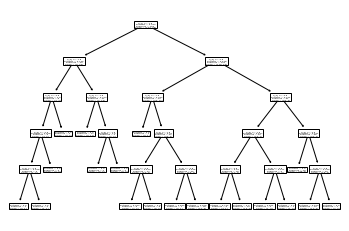

In [ ]:
#繪製決策樹圖型(黑白)
tree.plot_tree(DT)

In [ ]:
#儲存圖形(可於左側載入區下載圖形)
import graphviz 
dot_data = tree.export_graphviz(DT) 
graph = graphviz.Source(dot_data) 
graph.render("loan") 

'loan.pdf'

In [ ]:
dot_data = tree.export_graphviz(DT, out_file=None, 
                      feature_names=['Industry_type','Company_type','Beginning_time','Bank_relationship','Capital_increase','Age','Education','Credit'],    
                      filled=True, rounded=True)  
graph = graphviz.Source(dot_data)  
graph 
graph.render("loan2") 

'loan2.pdf'

In [ ]:
#繪製決策樹圖形(彩色)
dot_data = tree.export_graphviz(DT,feature_names=['Industry_type','Company_type','Beginning_time','Bank_relationship','Capital_increase','Age','Education','Credit'],
                                filled=True, rounded=True)  
graph = graphviz.Source(dot_data)  
graph 
graph.render("loan2") 

'loan2.pdf'

# 作業(決策樹)：
(1)請利用boston_house(type).xlsx檔案中的指標，以決策樹來預測boston house的房價高低(Price Type)，分析後請畫出決策樹，並說明決策樹之主要判定準則。

註： 1.資料與預測指標說明如附檔。 2.Price Type:1表單位房價低於20，2表單位房價高於20。